# МАДМО

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
Домашнее задание необходимо загрузить в общий репозиторий с именной папкой 


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [29]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [13]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((1000,1000))
b = np.random.sample((1000,1000))
# выведите ранг каждой матрицы с помощью функции np.linalg.rank.
print(np.linalg.matrix_rank(a))
print(np.linalg.matrix_rank(b))
print(a.shape, b.shape)

1000
1000
(1000, 1000) (1000, 1000)


In [38]:
def mult(a, b):
    a_rows, a_cols = a.shape
    b_rows, b_cols = b.shape
    
    if a_rows != b_cols:
        print ("Перемножение указанных матриц недопустимо!")
    else:
        A = [[0 for i in range(a_rows)] for j in range(b_cols)]
        for i in range(a_rows):
            for j in range(a_cols):
                for k in range(b_cols):
                    A[i][k] += a[i][j] * b[j][k]
        return A
    pass

In [36]:
def np_mult(a, b):
    print(np.dot(a,b))
    pass

In [39]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 17min 56s


In [40]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

[[ 240.57333143  243.09673558  243.90910157 ...,  240.73322739
   242.65313257  242.70143124]
 [ 246.71981395  247.31155442  246.77790466 ...,  243.71631971
   251.54121079  251.84494219]
 [ 250.35132973  251.96880676  249.9318673  ...,  251.59831653
   254.24205667  251.50392908]
 ..., 
 [ 252.6690299   255.92249219  251.80820629 ...,  252.71572177
   248.67090505  257.1275096 ]
 [ 245.82498049  250.44842332  248.43855116 ...,  241.07392577
   251.10027872  249.33529121]
 [ 251.637592    249.67440676  247.23194078 ...,  247.05407754
   261.62228642  252.28968626]]
Wall time: 59 ms


### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [51]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    B = np.cumsum(A)/[range(1, A.size + 1)]
    return B
    pass


In [52]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        S[i] = A[i] + S[i-1]
    for i in range(len(A)):
        S[i] /= i + 1
    return S


# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 1.93 s
Wall time: 8.87 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [153]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = np.array(X.copy())
    Y[1::2] = a
    Y[::2] **= 3
    Y = Y[::-1]
    Y = np.append(X,Y)
    Y = np.flip(Y, axis = 0)
    return Y



In [154]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    Y = X.copy()
    Y2 = []   
    for i in range(0,len(Y),2):
        Y2.append(Y[i]**3) # четные в новый массив и сразу в ^3
    Y2 = Y2[::-1]
    for i in range(len(Y)):
        if i%2==1:
            Y[i] = Y2[(i//2)]
        else:
            Y[i] = a 
    XY = list(X) + list(Y)
    XY = XY[::-1]
    return XY




In [161]:
X = sps.uniform.rvs(size=10 ** 6) 

# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()


Wall time: 88 ms
Wall time: 1 s


0.0

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# В numpy используются оптимизированные алгоритмы, реализованные на С. 

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [176]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

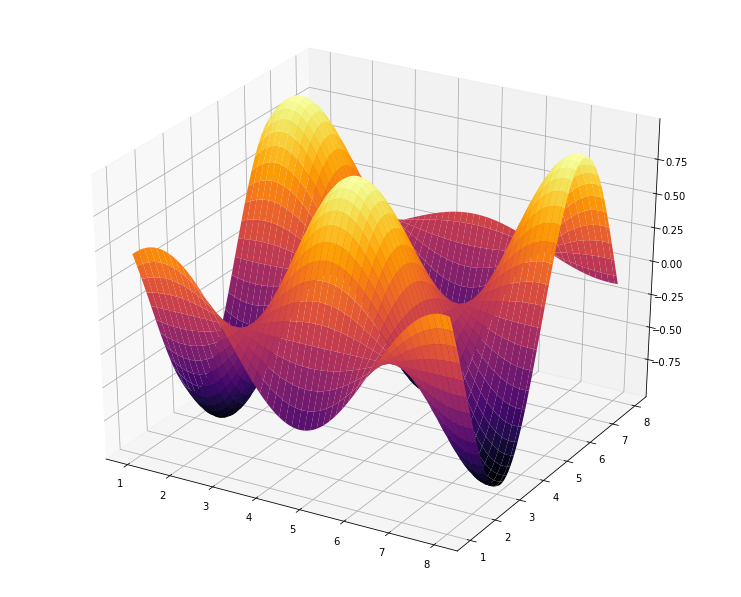

In [189]:
grid_x, grid_y = np.meshgrid(np.linspace(1, 8, 100), np.linspace(1, 8, 100))

draw_f(grid_x, grid_y)

### Задача 5*

Выберите любую картинку и загрузите ее в папку с кодом. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [162]:
from matplotlib import pyplot as plt
%matplotlib inline

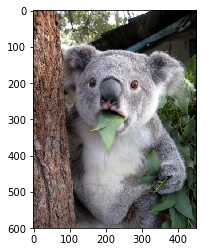

In [163]:
path_to_image = './koala_lid.jpg'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [174]:
flat_image_array= np.array(image_array.ravel())
print(flat_image_array)

[130  93  67 ...,  38  58  46]


In [175]:
print(flat_image_array.size)

810000
